In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools

import os, sys

project_root = '/user_data/mmhender/featsynth/'
# sys.path.append(os.path.join(project_root, 'code'))
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt3

In [2]:
trial_data_all, subjects, cue_level_names, image_type_names = analyze_expt3.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_condition, dprime_by_condition, propleft_by_condition, rt_by_condition = analyze_expt3.get_perf_by_cond()

acc_by_run, dprime_by_run, rt_by_run = analyze_expt3.get_perf_by_run()

acc_by_supcat, dprime_by_supcat, rt_by_supcat = analyze_expt3.get_perf_by_supercateg()

In [3]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt3.get_categ_info()

In [4]:
subjects

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

#### Plotting params

In [5]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = np.array([-0.2, 0.2])
barwidth = xjitters[1]*2

#### d-prime values: two-way repeated measures anova, all subjects

In [7]:
vals = dprime_by_condition

print('\nAll subjects:')
print(vals.shape)

aov_table = stats_utils.rmanova_2way(vals, ['cond','image_type'])

print(aov_table)


All subjects:
(18, 2, 5)
                    F Value  Num DF  Den DF        Pr > F
cond              37.332627     1.0    17.0  1.155355e-05
image_type       227.751530     4.0    68.0  1.356214e-38
cond:image_type   10.265348     4.0    68.0  1.460146e-06


#### t-tests comparing basic vs superordinate, within image type

In [8]:
tvals = np.zeros((5,))
pvals = np.zeros((5,))

df = pd.DataFrame(index=image_type_names)

vals = dprime_by_condition

print('All subjects:')
print(vals.shape)

for ii in range(n_image_types):

    p, t = stats_utils.paired_ttest_nonpar(vals[:,0,ii], vals[:,1,ii])

    tvals[ii] = t
    pvals[ii] = p

df['t (basic-super)'] = tvals.round(4)

_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr
# df['p'] = pvals
        
df        
    

All subjects:
(18, 2, 5)


,t (basic-super),p
pool1,-3.9082,0.006667
pool2,-4.3200,0.000000
pool3,-2.4030,0.040000
pool4,-5.6034,0.000000
orig,0.9924,0.316000


#### plot dprime, all subjects

Text(0.5, 1.0, 'All subjects (n=18)')

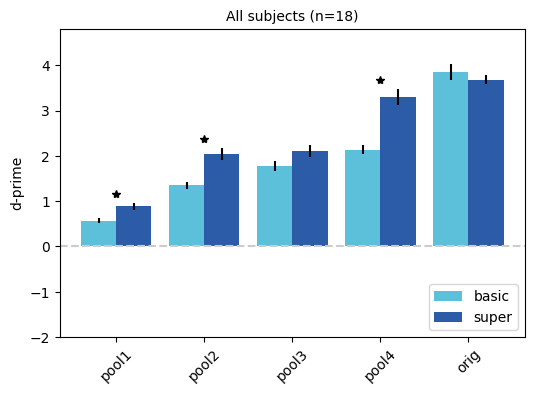

In [9]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(6,4))

vals = dprime_by_condition

n_subs_plot = vals.shape[0]
    
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
  
ax = plt.subplot(1,1,1)


lh = []

for ii in range(n_image_types):
    
    for cc, cue in enumerate(cue_level_names):
    
        h = plt.bar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                        color = cue_level_colors[cc,:], width=barwidth)
        
        plt.errorbar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                         semvals[cc,ii], \
                        color = 'k',
                        linestyle='none')
    
        lh.append(h)

    if pvals[ii]<0.01:
        height = np.max(meanvals[:,ii]+semvals[:,ii])+0.20
        plt.plot(ii, height, '*', color='k')

    
plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)

    
    

plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

ax.legend(lh, cue_level_names, loc='lower right')

plt.ylabel('d-prime')

plt.ylim([-2, 4.8])

plt.title('All subjects (n=%d)'%(n_subs_plot))

In [10]:
vals = rt_by_condition

print('\nAll subjects:')
print(vals.shape)

aov_table = stats_utils.rmanova_2way(vals, ['cond','image_type'])

print(aov_table)


All subjects:
(18, 2, 5)
                   F Value  Num DF  Den DF        Pr > F
cond              7.393479     1.0    17.0  1.458157e-02
image_type       49.059709     4.0    68.0  2.379863e-19
cond:image_type  18.906179     4.0    68.0  1.721987e-10


#### compare basic vs superordinate, within image type

In [11]:
tvals = np.zeros((5,))
pvals = np.zeros((5,))

df = pd.DataFrame(index=image_type_names)

vals = rt_by_condition

print('All subjects:')
print(vals.shape)

for ii in range(n_image_types):

    p, t = stats_utils.paired_ttest_nonpar(vals[:,0,ii], vals[:,1,ii])

    tvals[ii] = t
    pvals[ii] = p

df['t (basic-super)'] = tvals.round(4)

_, pvals_fdr = stats_utils.fdr_keepshape(pvals, alpha=0.01, method='poscorr')
df['p'] = pvals_fdr
        
df        
    

All subjects:
(18, 2, 5)


,t (basic-super),p
pool1,3.1427,0.003333
pool2,3.6248,0.000000
pool3,3.4854,0.005000
pool4,3.8011,0.000000
orig,-2.8853,0.016000


#### plot RTs, all subjects

Text(0.5, 1.0, 'All subjects (n=18)')

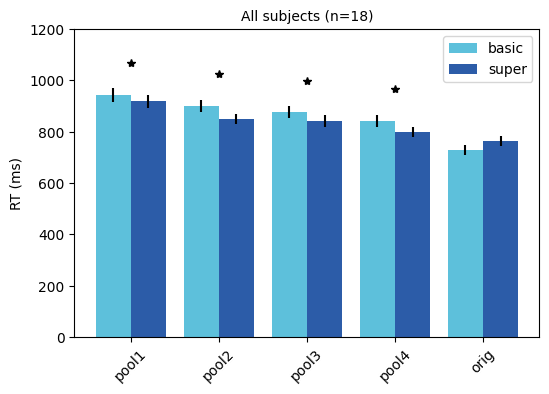

In [12]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(6,4))

vals = rt_by_condition

n_subs_plot = vals.shape[0]
    
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
  
ax = plt.subplot(1,1,1)


lh = []

for ii in range(n_image_types):
    
    for cc, cue in enumerate(cue_level_names):
    
        h = plt.bar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                        color = cue_level_colors[cc,:], width=barwidth)
        
        plt.errorbar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                         semvals[cc,ii], \
                        color = 'k',
                        linestyle='none')
    
        lh.append(h)

    if pvals[ii]<0.01:
        height = np.max(meanvals[:,ii]+semvals[:,ii])+100
        plt.plot(ii, height, '*', color='k')

    
plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)

    
    

# plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

ax.legend(lh, cue_level_names, loc='upper right')

plt.ylabel('RT (ms)')

plt.ylim([0, 1200])

plt.title('All subjects (n=%d)'%(n_subs_plot))

Text(0.5, 1.0, 'All subjects (n=18)')

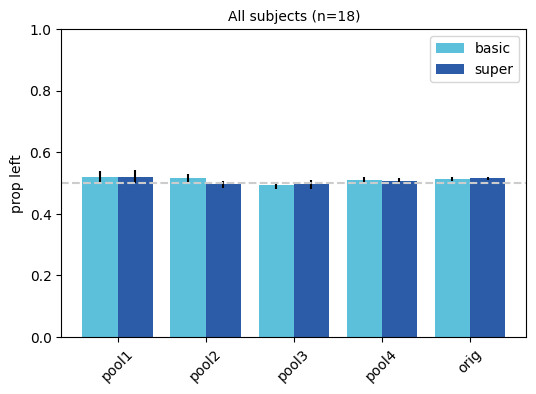

In [13]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(6,4))

vals = propleft_by_condition

n_subs_plot = vals.shape[0]
    
meanvals = np.mean(vals, axis=0)
semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)
  
ax = plt.subplot(1,1,1)


lh = []

for ii in range(n_image_types):
    
    for cc, cue in enumerate(cue_level_names):
    
        h = plt.bar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                        color = cue_level_colors[cc,:], width=barwidth)
        
        plt.errorbar(ii+xjitters[cc], \
                         meanvals[cc,ii], \
                         semvals[cc,ii], \
                        color = 'k',
                        linestyle='none')
    
        lh.append(h)

    # if pvals[ii]<0.01:
    #     height = np.max(meanvals[:,ii]+semvals[:,ii])+0.20
    #     plt.plot(ii, height, '*', color='k')

    
plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)

    
    

plt.axhline(0.5, color=[0.8, 0.8, 0.8], linestyle='--')

ax.legend(lh, cue_level_names, loc='upper right')

plt.ylabel('prop left')

plt.ylim([0, 1.0])

plt.title('All subjects (n=%d)'%(n_subs_plot))

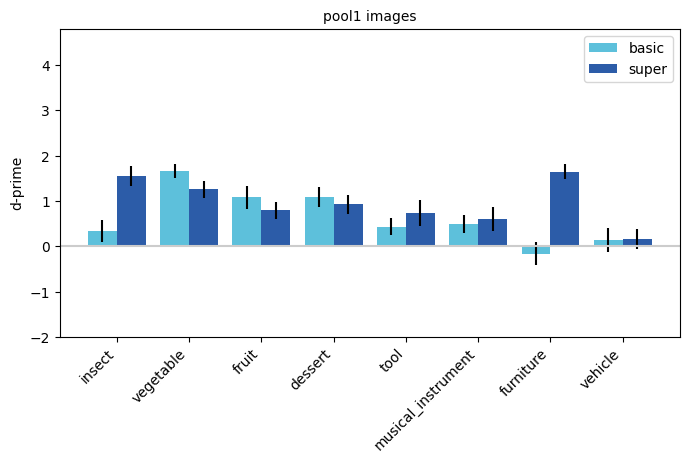

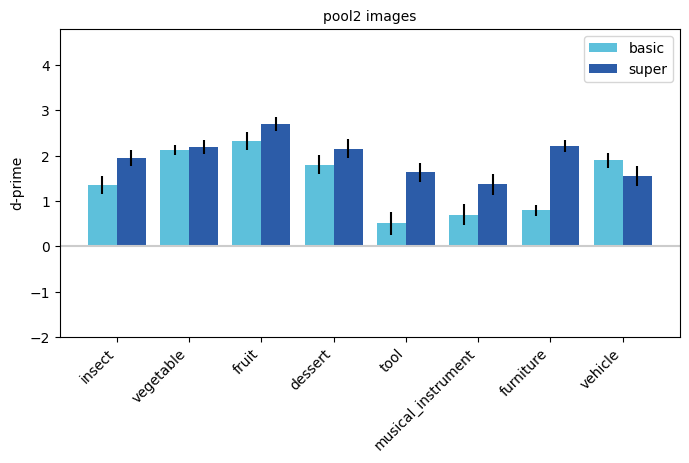

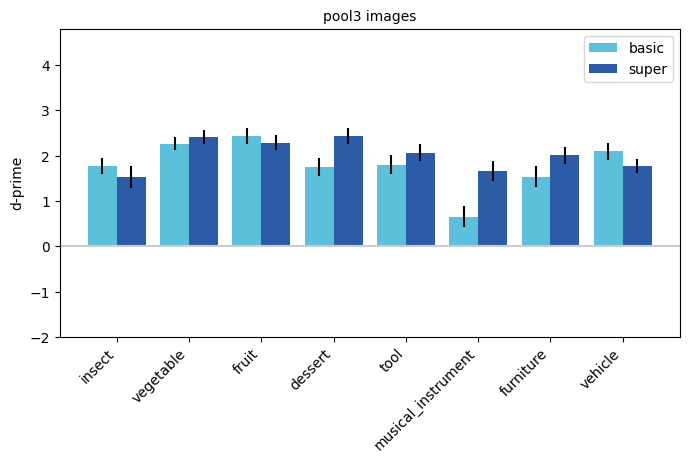

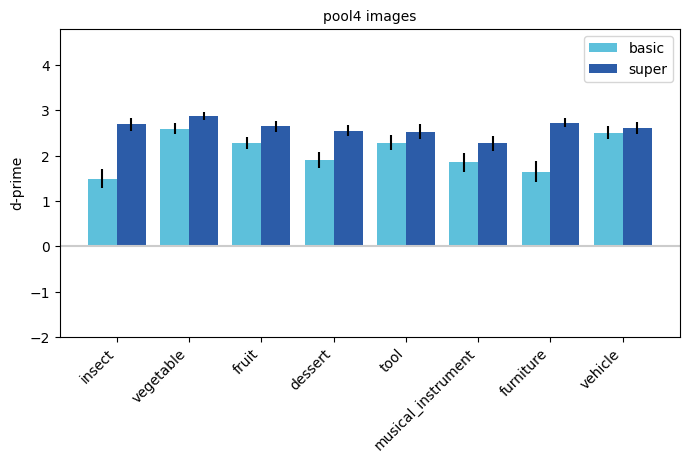

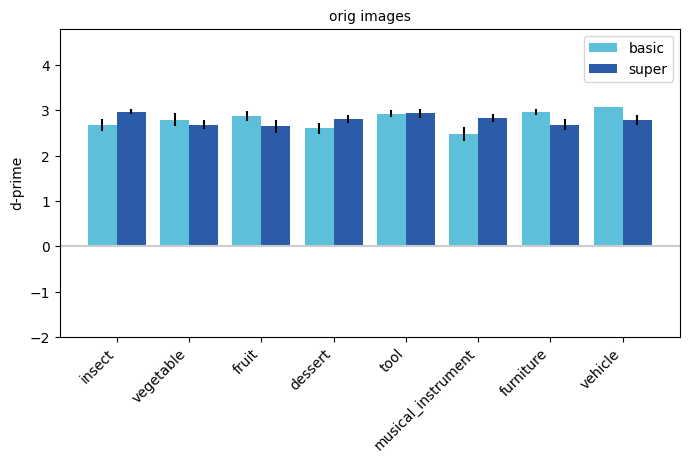

In [14]:
import scipy.stats

for ii in range(5):


    plt.figure(figsize=(8,4))

    ax = plt.subplot(1,1,1)

    d = dprime_by_supcat[:,:,ii,:]
    n_super = d.shape[2]

    # t, p = scipy.stats.ttest_rel(d[:,0,:], d[:,1,:], axis=0, alternative='two-sided')

    meanvals = np.mean(d, axis=0)
    semvals = np.std(d, axis=0)/np.sqrt(d.shape[0])

    lh = []
    for cc in [0,1]:

        x = np.arange(n_super)+xjitters[cc]

        h = plt.bar(x, meanvals[cc,:], color=cue_level_colors[cc,:], width=xjitters[1]*2)

        lh.append(h)

        plt.errorbar(x, meanvals[cc,:], semvals[cc,:], linestyle='none', color='k')


#     for sc in range(n_super):

#         if p[sc]<0.01:
#             height = np.max(meanvals[:,sc]+semvals[:,sc])+0.20
#             plt.plot(sc, height, '*', color='k')

    plt.xticks(np.arange(n_super), super_names, rotation=45, ha='right');

    plt.ylabel('d-prime')

    plt.ylim([-2, 4.8])

    ax.legend(lh, cue_level_names, loc='upper right')


    plt.axhline(0, color=[0.8, 0.8, 0.8])

    plt.title('%s images'%(image_type_names[ii]))

In [13]:
np.sum(np.isnan(dprime_by_supcat))

10

In [21]:
dprime_by_supcat.shape

(5, 2, 5, 8)

Text(0.5, 0.98, 'Response Time')

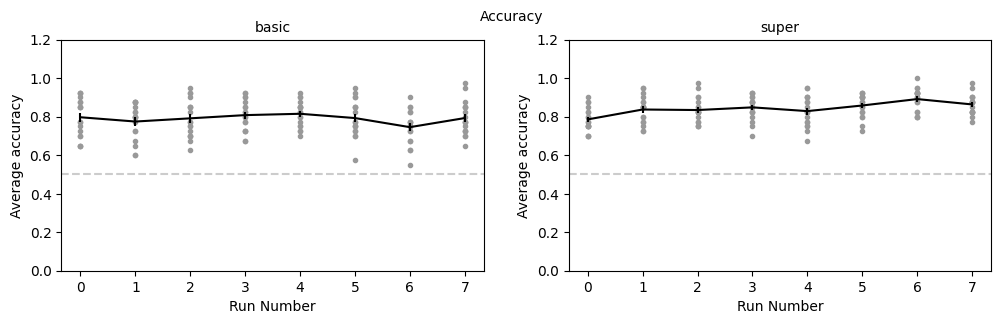

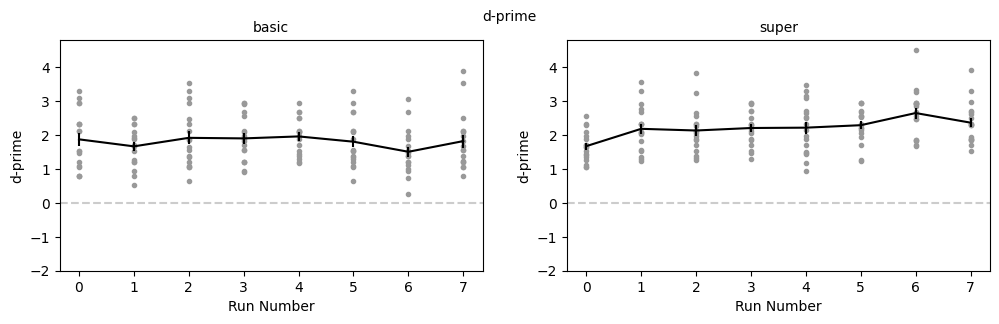

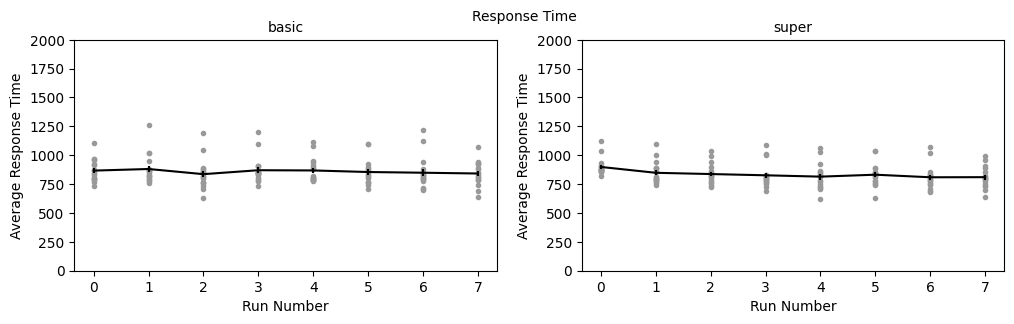

In [15]:
plt.figure(figsize=(12,3))

for cc in range(2):
    
    plt.subplot(1,2,cc+1)
    
    plot_vals = acc_by_run[:,cc,:]
    
    n_runs = plot_vals.shape[1]
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    
    for si in range(n_subjects):
        plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
    plt.xticks(np.arange(n_runs))
    plt.xlabel('Run Number')
    plt.ylabel('Average accuracy')
    plt.axhline(0.50, color=[0.8, 0.8, 0.8], linestyle='--')
    plt.ylim([0.0, 1.2])
    
    plt.title(cue_level_names[cc])
    
plt.suptitle('Accuracy')




plt.figure(figsize=(12,3))

for cc in range(2):
    
    plt.subplot(1,2,cc+1)
    
    plot_vals = dprime_by_run[:,cc,:]
    
    n_runs = plot_vals.shape[1]
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])
    
    for si in range(n_subjects):
        plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
    plt.xticks(np.arange(n_runs))
    plt.xlabel('Run Number')
    plt.ylabel('d-prime')
    plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')
    plt.ylim([-2, 4.8])
    
    plt.title(cue_level_names[cc])
    
plt.suptitle('d-prime')



plt.figure(figsize=(12,3))

for cc in range(2):
    
    plt.subplot(1,2,cc+1)
    
    plot_vals = rt_by_run[:,cc,:]
    
    meanvals = np.mean(plot_vals, axis=0)
    semvals = np.std(plot_vals, axis=0)/np.sqrt(plot_vals.shape[0])

    for si in range(n_subjects):
        plt.plot(np.arange(n_runs), plot_vals[si,:],'.',color=[0.6, 0.6, 0.6])
    plt.errorbar(np.arange(len(meanvals)), meanvals, semvals, color='k')
    plt.xticks(np.arange(n_runs))
    plt.xlabel('Run Number')
    plt.ylabel('Average Response Time')
    ylims = [0, 2000]
    plt.ylim(ylims)
    
    plt.title(cue_level_names[cc])
    
plt.suptitle('Response Time')

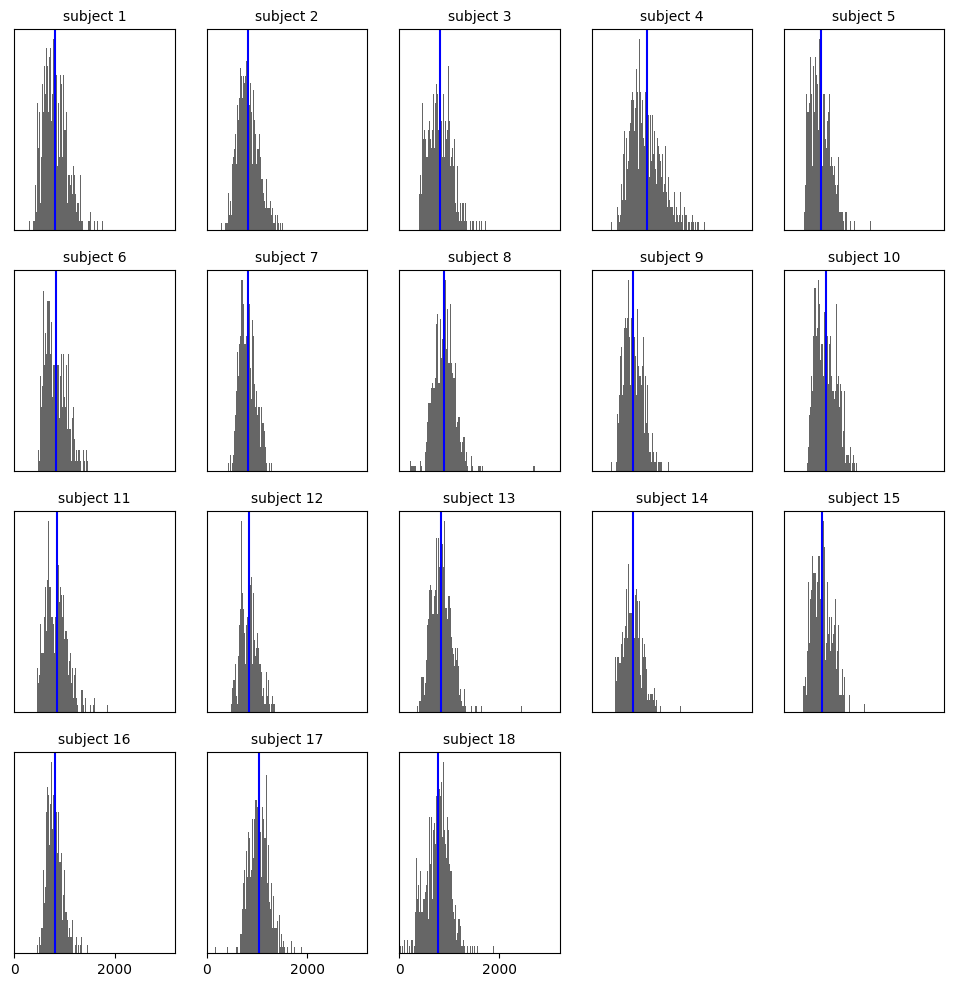

In [16]:
plt.figure(figsize=(12,12))
npy = int(np.ceil(np.sqrt(n_subjects)))
npx = int(np.ceil(n_subjects/npy))
xlims = [0, 1200+2000]

for si,ss in enumerate(subjects):

    plt.subplot(npx, npy, si+1)
    
    rts = np.array(trial_data_all['rt'])[trial_data_all['subject']==ss]
    
    rts = rts[~np.isnan(rts)]
    
    assert(np.all(rts<=3200))
    
    plt.hist(rts,100, color=[0.4, 0.4, 0.4]);
    
    plt.title('subject %d'%ss)
    
    plt.xlim(xlims)
    if si<((npx-1)*(npy)):
        plt.xticks([])
    plt.yticks([])
    
    plt.axvline(np.mean(rts), color='b')